# U.S. Medical Insurance Costs

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Overlook the dataset

We have two popular ways to import and over look our dataset:
- Using pandas library and convert the data type to dataframe
- Using csv library and use Dictionary datatype.

### Method 1: Using pandas

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Some details about the dataset:
 - It's have 7 columns
 - 1338 rows
 - No null colums
 - Some columns are numberic and others are string.

### Method 2
We also have the same result that compare with method 1.

In [33]:
def get_data():
    with open('insurance.csv', newline='') as insurance:
        data = csv.DictReader(insurance)
        return data
data_insurance = get_data()
print(data_insurance)

## Scoping Our Project

![diagram for data analytics](https://content.codecademy.com/PRO/paths/data-science/Portfolio-Project-Scope-Diagram.PNG)

As you can see from the diagram, we need to scoping our project before we start, it's also help us to define what data we need, what analytical method that we should to consider.

Here is some question I will answer via the dataset:
- Find out the average age of the patients in the dataset.
- Analyze where a majority of the individuals are from.
- Look at the different costs between smokers vs. non-smokers.
- Figure out what the average age is for someone who has at least one child in this dataset.

### Question 1: Find out the average age of the patients in the dataset

In [ ]:
# Method 1: Using Numpy
average_age = np.mean(df["age"])
print("Average age of patients caculate by pandas are: " + str(average_age))

In [ ]:
# Method 2: Using for loop
with open('insurance.csv', newline='') as insurance:
    total_age = 0
    count = 0
    data = csv.DictReader(insurance)
    for age in data:
        total_age += int(age["age"])
        count += 1
    average_age_by_loop = total_age / count
print("Average age of patients caculate by loop  are: {}".format(average_age_by_loop))

### We can use seaborn to see the distribution of dataset by age

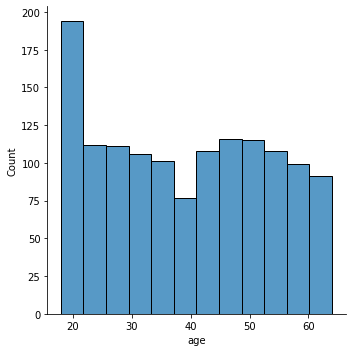

In [12]:
sns.displot(df, x="age", bins = 12)
plt.show()

### Question 2: Analyze where a majority of the individuals are from.

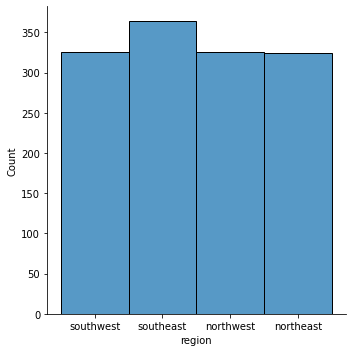

In [17]:
sns.displot(df, x = 'region')

### Question 3: Look at the different costs between smokers vs. non-smokers.

In [50]:
def count_the_cost(data):
    total_smoker_charges = 0
    total_non_smoker_charges = 0
    for people in data:
        if people["smoker"] == 'yes':
            total_smoker_charges += float(people["charges"])
        elif people["smoker"] == 'no':
            total_non_smoker_charges += float(people["charges"])
    return total_smoker_charges, total_non_smoker_charges

In [56]:
with open("insurance.csv") as insurance:
    data = csv.DictReader(insurance)
    smoker, non_smoker = count_the_cost(data)
    print("The total cost of non smoker are: {} and the smoker are: {}".format(smoker, non_smoker))

The total cost of non smoker are: 8781763.52184 and the smoker are: 8974061.468918996


### We try to answer the question directly via Seaborn Distribution charts.

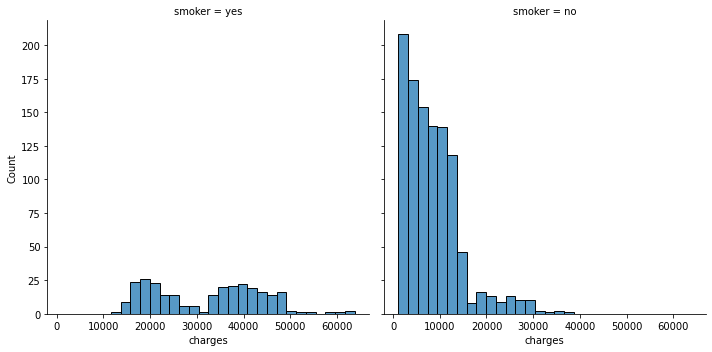

In [64]:
sns.displot(df, x = "charges", col="smoker", multiple="dodge")

### Question 4: Figure out what the average age is for someone who has at least one child in this dataset.

In [69]:
with open("insurance.csv") as insurance:
    data = csv.DictReader(insurance)
    total_age = 0
    count = 0
    for people in data:
        if (int(people["children"]) >= 1):
            total_age += int(people["age"])
            count += 1
    average_age = total_age/count
    print("The average age is for someone who has at least one child in this dataset is "+ str(average_age))

The average age is for someone who has at least one child in this dataset is 39.78010471204188
